# The influence of healthcare spending on life expectancy
## An essay by Frank Kloosterman & Jochem Vlug

![Healthcare](http://northcentralhealthdistrict.org/wp-content/uploads/2017/07/Coalition-banner.jpg)

## Introduction

In this report, a data analysis has been conducted on healthcare around the world. Using data from three datasets, we try to answer our research question:

*"What is the relation between life expectancy and healthcare spending?"*

This research question has two sub questions:
- Is there a relation between healthcare spending by government and life expectancy?
- Is there a relation between personal healthcare spending and life expactancy?
- Is there a relation between GDP and personal healthcare spending?


## Packages

In [2]:
import pandas as pd #pandas, needed for data frames.
import numpy as np #numpy, for math operations and arrays.
import matplotlib.pyplot as plt #matplotlib, for making plots.
import missingno as msno #missingno, a usefull library for checking missing values.
import pdb #pythondebugger, native debugger of python.
%matplotlib inline 
#plots graphs directly below codeblocks.

## Datasets

In [3]:
#Worlddatabank on Social Development Goals
world_bank = pd.read_csv("data/SDG_csv/SDGData.csv") #TODO: URL MUST BE ONLINE
#Dataset on life expectancy, WHO
life_expectancy = pd.read_csv("data/life-expectancy.csv") #TODO: URL MUST BE ONLINE
#Dataset on household pocketmoney, NHA. Second row is empty, so we skip it.
household_ppp = pd.read_excel("data/NHA-indicators.xlsx",skiprows=[1],index_col=0) #TODO: URL MUST BE ONLINE 

## Search the Data

In [4]:
#Search world_bank database for keyphrase
def searchData(myInput):
    variableList = []
    for sentence in list(world_bank["Indicator Name"].values):
        newSentence = np.array(sentence.split(" "))
        for words in (newSentence):
            if words.lower() == myInput.lower(): 
                variableList += [sentence]

    variableList = pd.unique(variableList)
    return variableList
searchData("") #insert search input here.
                                


array(['Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)'],
      dtype=object)

## Overview of the Data

In [6]:
#First summarise status of data by making a NaN matrix.
#msno.matrix(world_bank.sample(len(world_bank)))
#msno.matrix(life_expectancy.sample(len(life_expectancy)))
#msno.matrix(household_ppp.sample(len(household_ppp)))

## Transforming the Data

In [8]:
#This section makes a Top 20 list of richest and poorest countries based on GDP per capita, PPP.
#We will use these countries in further analysis

#Define the countries and their GDP's to determine Top richest and poorest.
countries = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["Country Name"]
GDP_2016 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2016"]
GDP_2017 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2017"]

#Combine the country names with GDP's
GDP_1617 = countries.to_frame().join(GDP_2017.to_frame()).join(GDP_2016.to_frame())
    
#Mask the entries in the top 20's of the list which are actually not countries.
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Macao SAR, China")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Hong Kong SAR, China")
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="North America")
#Masked San Marino as well, since almost no data available
GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="San Marino")

#Define the top20's
lowest_20 = GDP_1617.sort_values("2017")[0:20]
highest_20 = GDP_1617.sort_values("2017", ascending=False)[0:20]

lowest_countries = lowest_20["Country Name"]
highest_countries = highest_20["Country Name"]
    
#Concate the highest and lowest together.
newCountries = pd.concat([lowest_countries, highest_countries])
#Changes the country names to match other database.
newCountries = newCountries.sort_values(ascending = True)

if len(newCountries) < 40:
    newCountries = str("Something went wrong.")
else:
    newCountries = list(newCountries.values)
       

In [74]:
#Match the countries of the SDG dataset with the countries of the Household_ppp dataset
household_countries = newCountries
household_countries[10]="DRC"
household_countries[13]="Gambia"
household_countries[39]="United States of America"

household_data = household_ppp.loc[household_countries]
household_data = household_data.drop(["Indicators",'Unnamed: 2'], axis = 1).T

D:\Python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [59]:
#Match the countries of the SDG dataset with the countries of the life expectancy dataset
life_exp_countries = newCountries
life_exp_countries[4]="Brunei"
life_exp_countries[11] = "Congo"
life_exp_countries[14] = "Gambia"

life_exp_data = life_expectancy.loc[life_expectancy["Entity"].isin(life_exp_countries)]

In [60]:
#Transform the life expectancy data into the same format as household data
#Create the dataframe by starting with the first
LE_total = pd.DataFrame()
for Country in life_exp_data["Entity"].unique():
    LE_country = life_exp_data[life_exp_data["Entity"]==Country]
    years = LE_country["Year"].values
    LE_country = LE_country.set_index(years)
    LE_country = LE_country.iloc[:,3:]
    LE_country.columns = [Country]
    if LE_total.empty:
        LE_total = LE_country
    else: 
        LE_total = pd.merge(LE_total, LE_country, left_index=True, right_index=True)    

In [78]:
#Rename to earlier variable with the same years as in household dataset
life_exp_data = LE_total[50:]
#life_exp_data

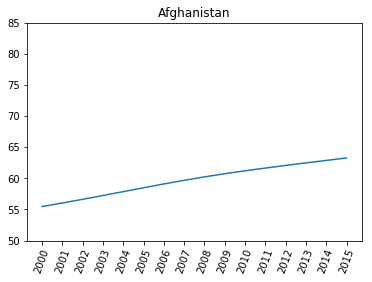

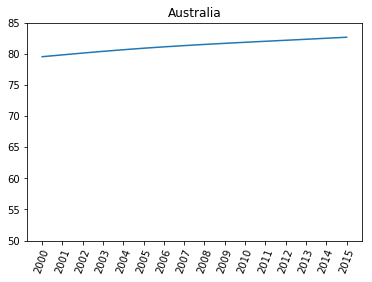

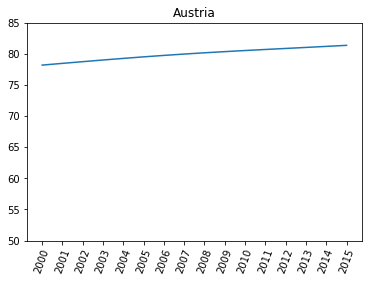

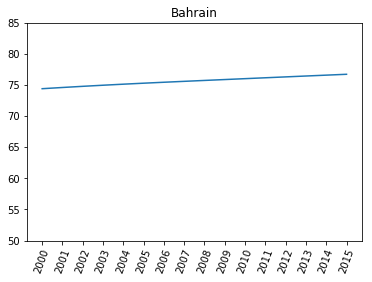

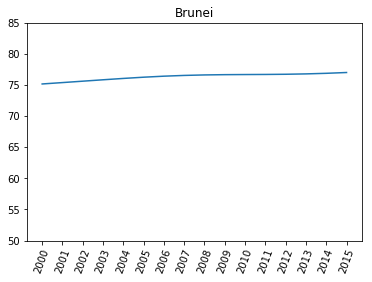

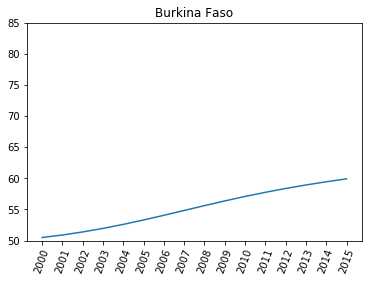

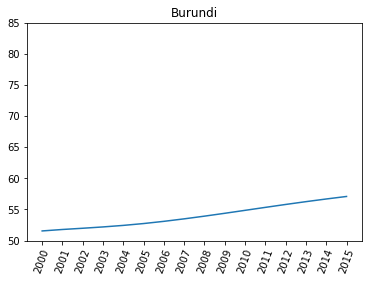

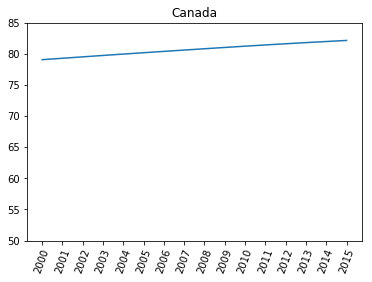

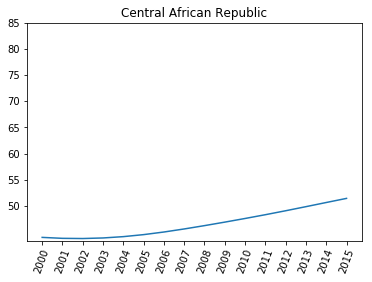

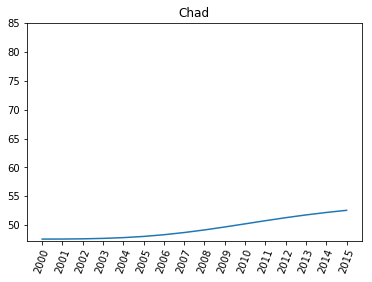

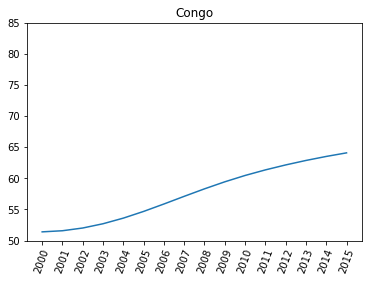

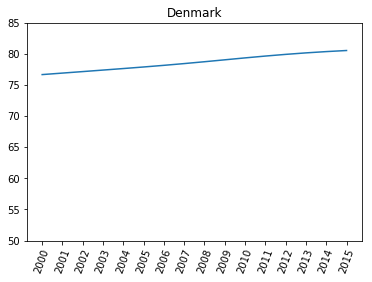

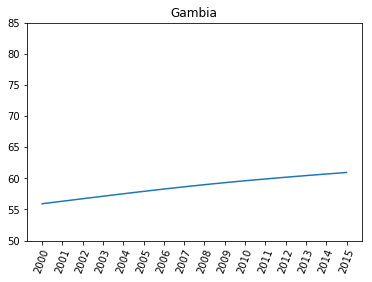

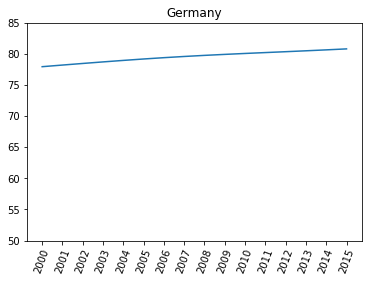

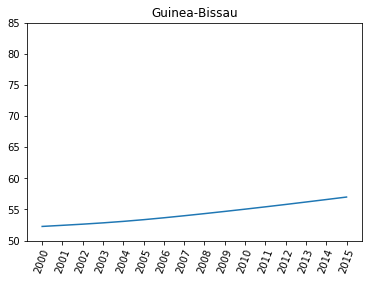

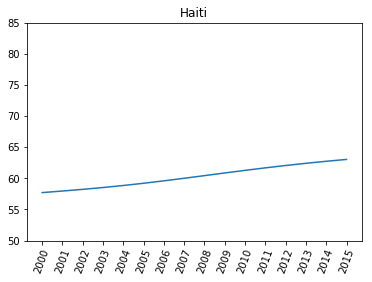

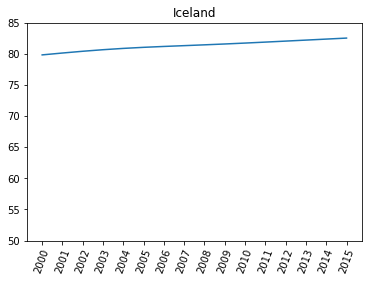

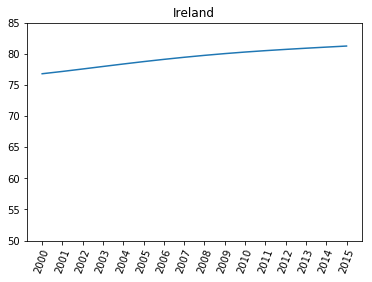

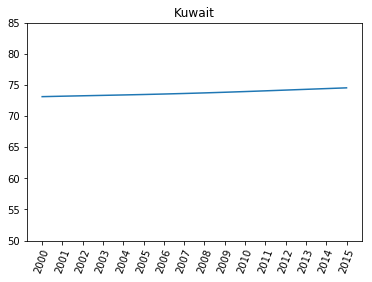

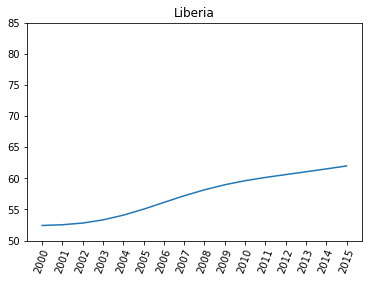

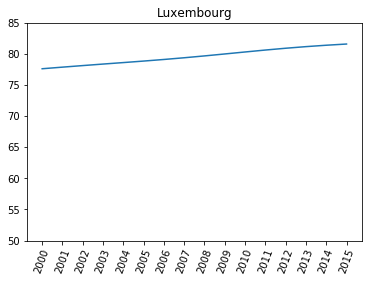

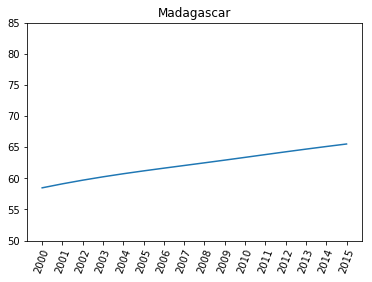

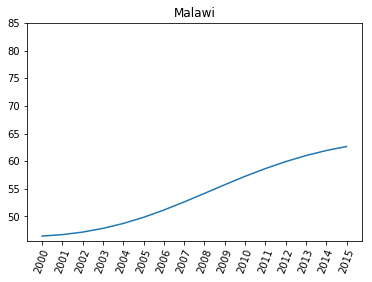

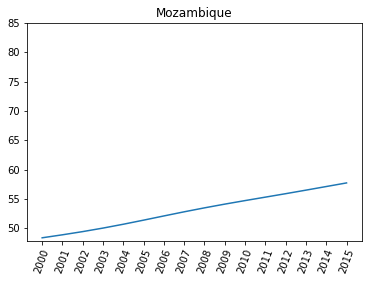

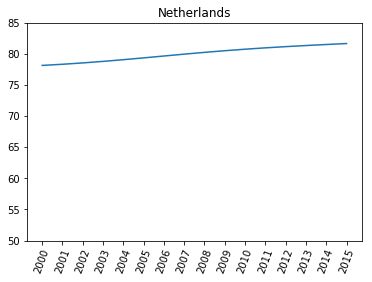

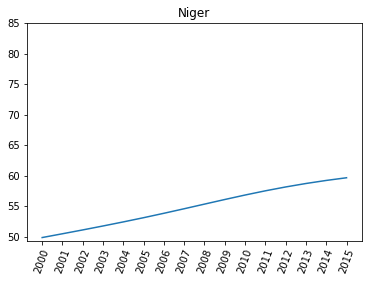

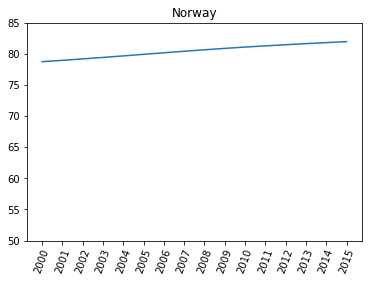

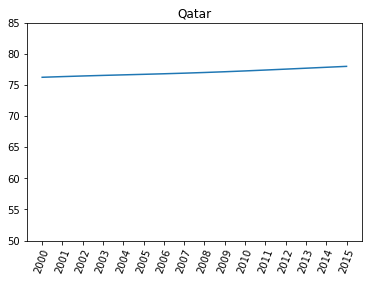

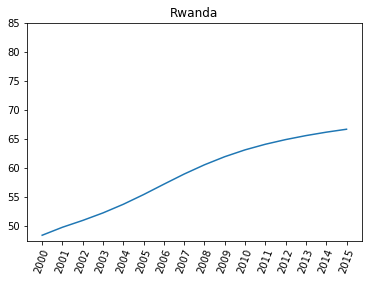

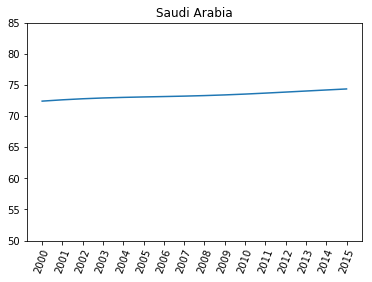

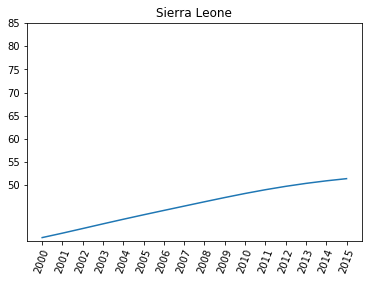

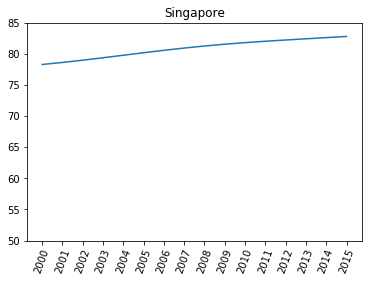

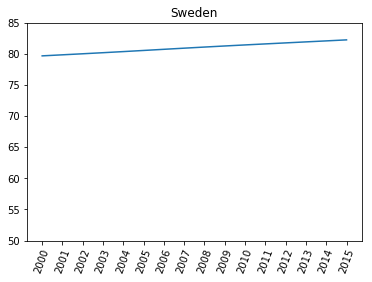

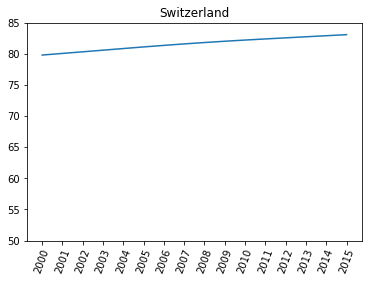

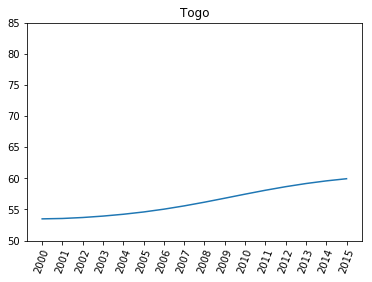

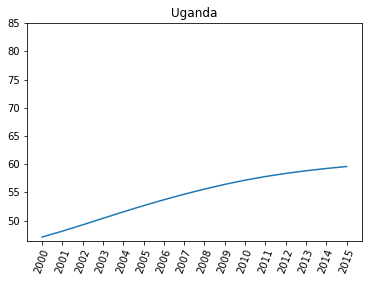

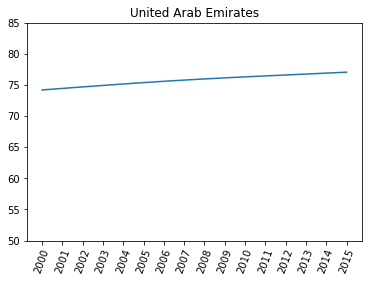

In [88]:
#Plot all countries to discover behaviour. 
for Country in life_exp_data.columns:
    Country_LE = life_exp_data[Country]
    Country_HH = household_data[Country]
    plt.plot(household_data.index, Country_LE)
    plt.title(Country)
    plt.xticks(rotation = 70)
    plt.yticks(np.arange(50,90,5))
    plt.show()
